In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
train = pd.read_csv("D:\Jupyter Notebook\Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [8]:
train.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF':'Low Fat', 'reg': 'Regular'}}, inplace = True)
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [26]:
encoder = LabelEncoder()
train['Item_Identifier'] = encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sie
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,0


<Axes: >

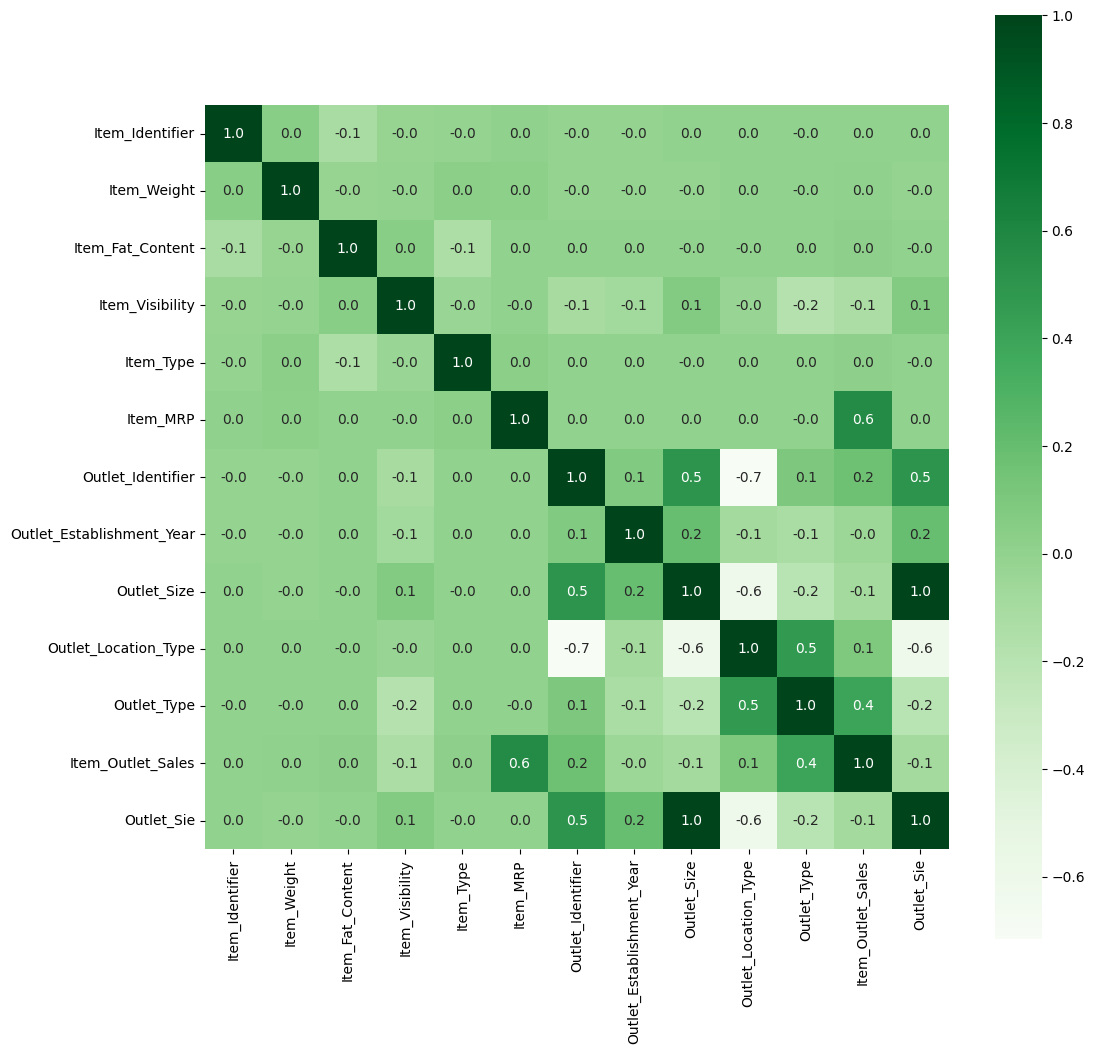

In [34]:
corr = train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Greens')

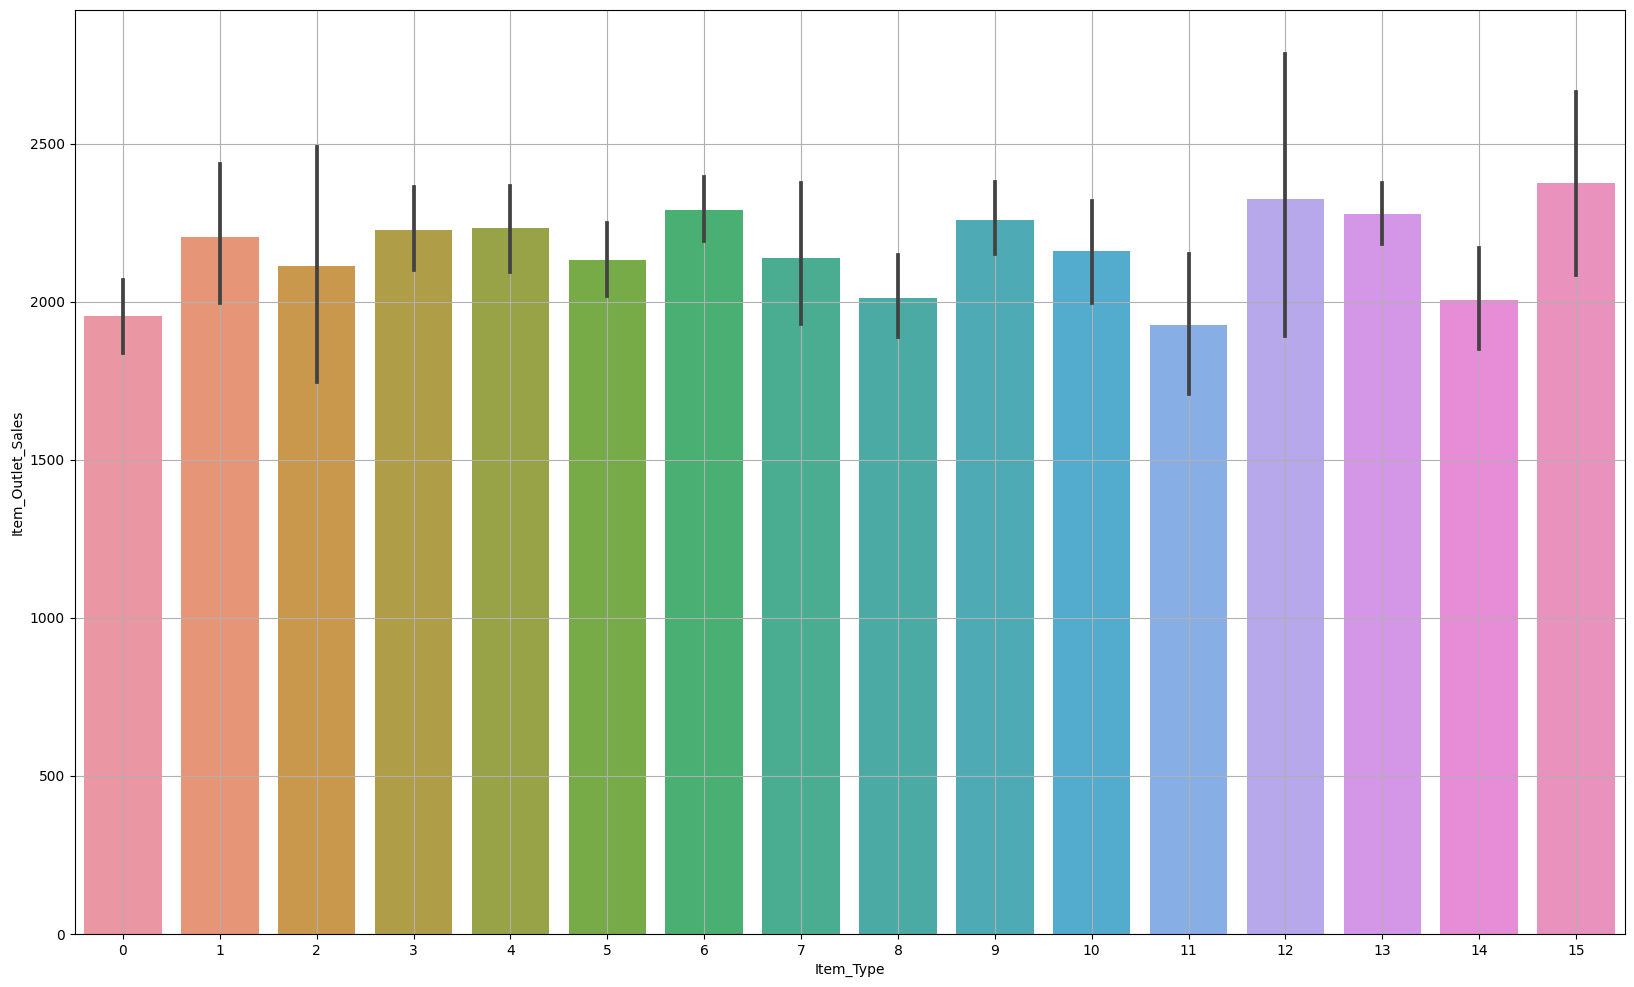

In [41]:
plt.figure(figsize=(20,12))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data = train)
plt.grid()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

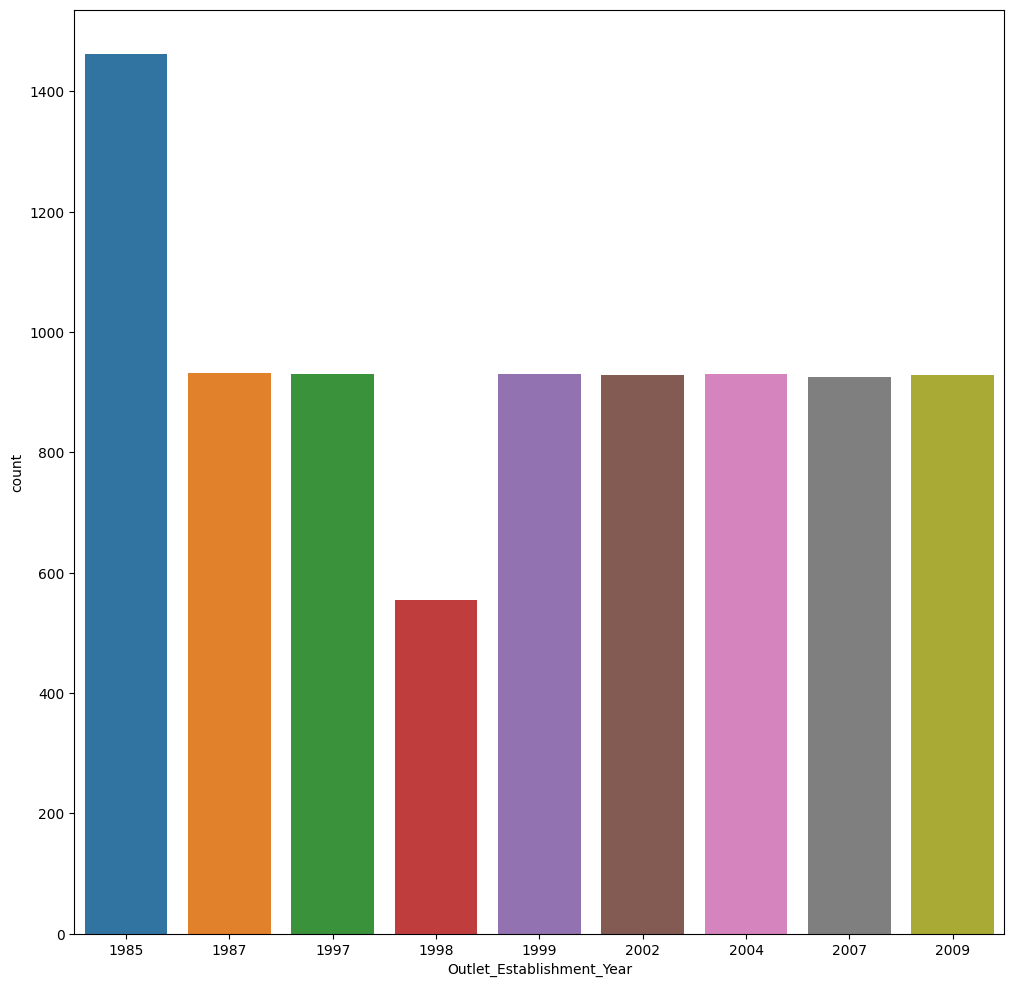

In [37]:
plt.figure(figsize=(12,12))
sns.countplot(x='Outlet_Establishment_Year', data = train)

<Axes: xlabel='Outlet_Type', ylabel='count'>

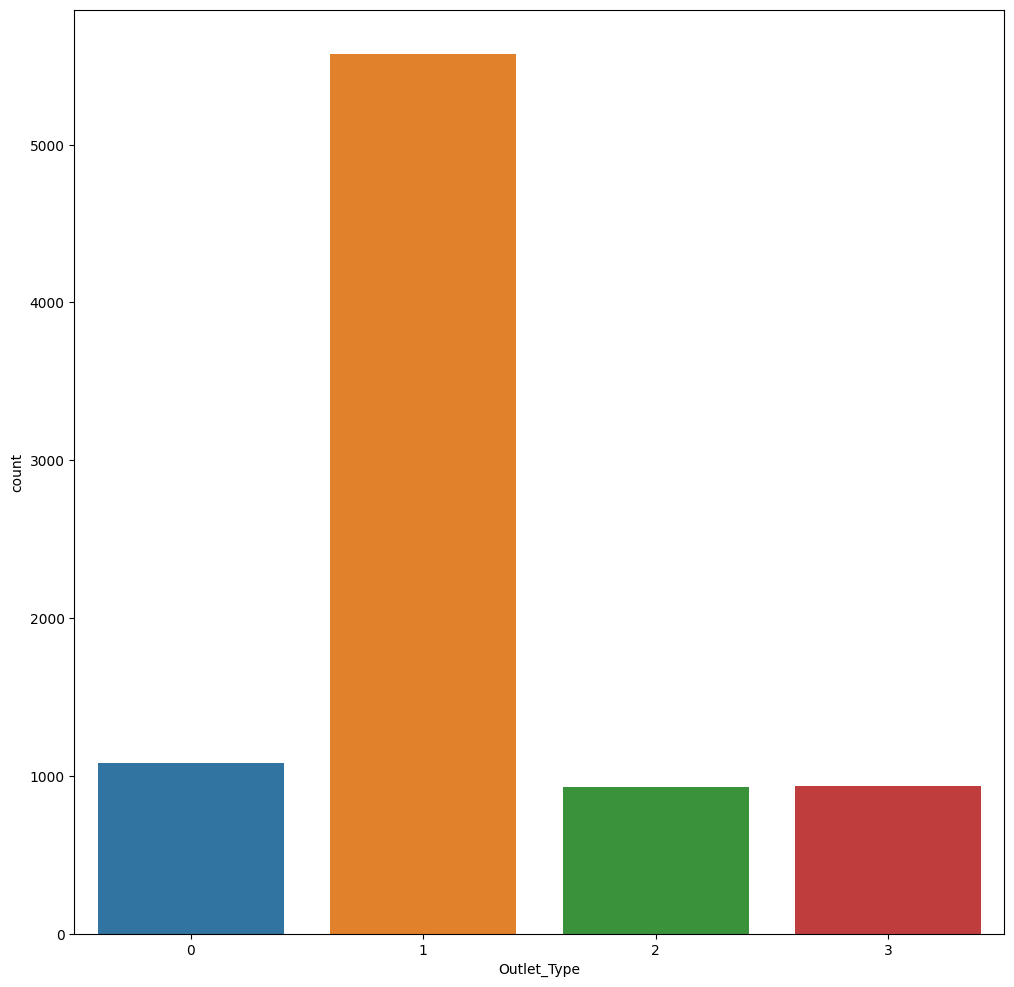

In [39]:
plt.figure(figsize=(12,12))
sns.countplot(x="Outlet_Type", data=train)

In [44]:
X = train.drop(columns='Item_Outlet_Sales', axis = 1)
y = train['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X.shape,X_train.shape)

(8523, 12) (6818, 12)


In [46]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
train_pred = model.predict(X_train)
train_pred

array([2172.693 , 2844.0671, 3308.6353, ..., 3363.3127, 1717.4066,
       2013.252 ], dtype=float32)

In [48]:
RSQscore = metrics.r2_score(y_train, train_pred)
print("R squared error for XGB Regressor: ", RSQscore)

R squared error for XGB Regressor:  0.8549833167058186


In [49]:
test_pred = model.predict(X_test)
test_pred

array([2098.7969, 4360.376 , 1454.3608, ..., 2883.5608, 1158.3351,
       3164.4902], dtype=float32)

In [51]:
RSQscore = metrics.r2_score(y_test, test_pred)
print("R squared error for XGB Regressor: ", RSQscore)

R squared error for XGB Regressor:  0.5191234777241828
